In [1]:
import pandas as pd

# Load the RBP list from the Excel file
rbp_list = pd.read_excel("/Users/jakobmaeots/Internship/Data/RBPDB_gene_list.xlsx")

# Assuming the RBP gene names are in a column named 'Gene Name'
rbp_genes = set(rbp_list['Gene Name'])

In [2]:
# Load your gene data from Data4
data4 = pd.read_excel("/Users/jakobmaeots/Internship/Data/Data4.xlsx")

# Assuming the gene names are in a column named 'Gene name'
data4_genes = set(data4['Gene name'])

In [3]:
# Find the intersection of the two sets to identify common genes
common_genes = rbp_genes.intersection(data4_genes)

# Print the common genes
print("RBP genes detected in Data4:")
print(common_genes)

RBP genes detected in Data4:
{'MBNL1', 'CIRBP', 'PUM1', 'SNRNP70', 'CSDE1', 'G3BP2', 'RALYL', 'ELAVL1', 'RBMS3', 'ELAVL4', 'PTBP2', 'ZFR2', 'SFPQ', 'NOVA1', 'SAMD4A', 'RBM6', 'ASCC1', 'TNRC6A', 'ELAVL2'}


In [8]:
# Define thresholds for differential expression
fold_change_threshold = 0.3
q_value_threshold = 0.1

# Filter differentially expressed genes
differentially_expressed_rbps = data4[
    (data4['Gene name'].isin(common_genes)) &
    (data4['Fold change'].abs() > fold_change_threshold) &
    (data4['q value'] < q_value_threshold)
]

# Print differentially expressed RBP genes
print("Differentially expressed RBP genes:")
print(differentially_expressed_rbps[['Gene name', 'Fold change', 'q value']])

Differentially expressed RBP genes:
    Gene name  Fold change   q value
321     RALYL     0.390644  0.012357
353     RBMS3     0.333109  0.004480
434    ELAVL4     0.314888  0.014485
510     MBNL1     0.376452  0.028977
592     CIRBP    -0.332354  0.044343


In [6]:
print(data4.columns)
print(rbp_list.columns)

Index(['Cell type', 'gene ID', 'Gene name', 'Gene biotype', 'Fold change',
       'Sample fold change', 'q value',
       'correlation (bulk mRNA/bulkized nuclear RNA)', 'Epilepsy DEG',
       'gene group', 'SFARI gene', 'Satterstrom', 'Sanders',
       'cell type-specific expression'],
      dtype='object')
Index(['Gene Name', 'Annotation ID', 'Synonyms', 'Gene Description', 'Species',
       'RNA-binding Domains', 'Number of experiments', 'Homologs'],
      dtype='object')


In [7]:
print(data4['Gene name'].head())
print(rbp_list['Gene Name'].head())

0     TTF2
1      MX2
2    ASCC1
3    GLRA3
4    CIRBP
Name: Gene name, dtype: object
0     RBM5
1     RBM6
2      NaN
3     YBX2
4    CSDE1
Name: Gene Name, dtype: object


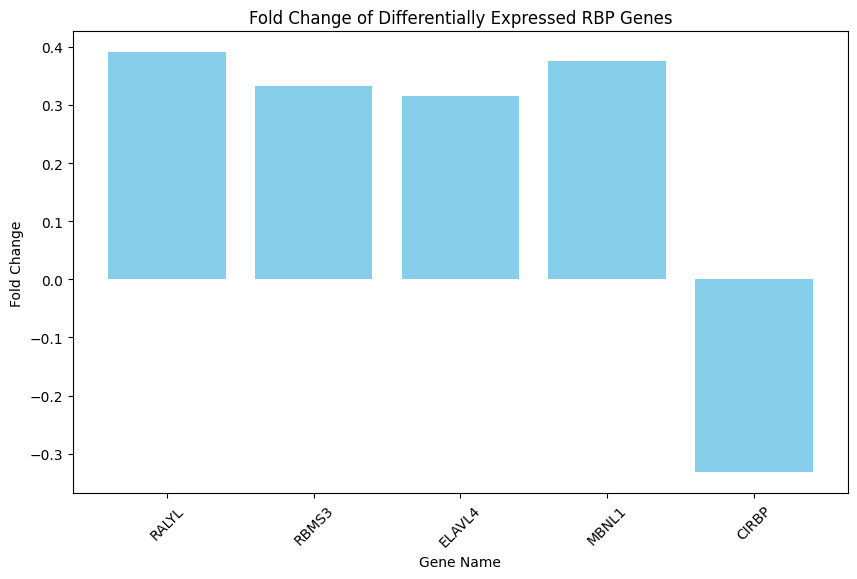

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming differentially_expressed_rbps is your DataFrame with the 5 genes
# Extract the relevant columns
genes_to_plot = differentially_expressed_rbps[['Gene name', 'Fold change']]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(genes_to_plot['Gene name'], genes_to_plot['Fold change'], color='skyblue')
plt.xlabel('Gene Name')
plt.ylabel('Fold Change')
plt.title('Fold Change of Differentially Expressed RBP Genes')
plt.xticks(rotation=45)
plt.show()